In [167]:
import datetime
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [168]:
conn_str = """
    Driver={ODBC Driver 17 for SQL Server};
    Server=109.71.11.235;
    Database=GFC.Hackathon;
    UID=participant;
    PWD=AiNRYmEatiBL;
"""

conn = pyodbc.connect(conn_str)

### Таблицы БД

In [169]:
#все таблицы в базе данных
query_tables = "SELECT * FROM sys.objects WHERE type in (N'U')"
tables = pd.read_sql(query_tables, conn)
tables

,name,object_id,principal_id,schema_id,parent_object_id,type,type_desc,create_date,modify_date,is_ms_shipped,is_published,is_schema_published
0,LocationStateStocks,885578193,None,1,0,U,USER_TABLE,2023-10-17 17:15:58.210,2023-10-17 17:15:58.210,False,False,False
1,LocationStateHourSales,917578307,None,1,0,U,USER_TABLE,2023-10-17 17:16:18.297,2023-10-17 17:16:18.297,False,False,False
2,Features,1045578763,None,1,0,U,USER_TABLE,2023-10-17 19:04:30.860,2023-10-17 19:04:30.860,False,False,False


In [170]:
#таблица LocationStateStocks
query_lss = "select top 100 * from dbo.LocationStateStocks"
lss = pd.read_sql(query_lss, conn)
lss

,LocationId,ProductId,Datetime,Quantity,Date
0,63,288524,2023-05-01,21.0,2023-05-01
1,63,288527,2023-05-01,181.0,2023-05-01
2,63,288606,2023-05-01,6.0,2023-05-01
3,63,288783,2023-05-01,11.0,2023-05-01
4,63,288817,2023-05-01,18.0,2023-05-01
...,...,...,...,...,...
95,63,297308,2023-05-01,18.0,2023-05-01
96,63,297309,2023-05-01,18.0,2023-05-01
97,63,297310,2023-05-01,15.0,2023-05-01
98,63,297311,2023-05-01,23.0,2023-05-01


In [171]:
#таблица LocationStateHourSales
query_lshs = "select top 100 * from dbo.LocationStateHourSales"
lshs = pd.read_sql(query_lshs, conn)
lshs


,LocationId,ProductId,Datetime,Quantity,PriceSum,Date
0,63,288606,2023-05-01 12:00:00,6.000,179.940002,2023-05-01
1,63,288606,2023-05-01 13:00:00,2.000,59.980000,2023-05-01
2,63,288783,2023-05-01 17:00:00,2.000,259.799988,2023-05-01
3,63,288913,2023-05-01 16:00:00,1.000,129.899994,2023-05-01
4,63,289117,2023-05-01 11:00:00,3.000,92.970001,2023-05-01
...,...,...,...,...,...,...
95,63,308898,2023-05-01 13:00:00,1.000,44.990002,2023-05-01
96,63,308898,2023-05-01 18:00:00,1.000,22.990000,2023-05-01
97,63,308905,2023-05-01 15:00:00,0.238,78.519997,2023-05-01
98,63,308905,2023-05-01 20:00:00,0.282,93.029999,2023-05-01


In [172]:
# пример запросов - здесь выведен весь датасет признаков
query_features = "select top 100 * from dbo.Features"
df = pd.read_sql(query_features, conn)
df

,LocationId,ProductId,ValidationDateTime,Probability,IsCorrect,Column6,Column7,Column8,Column9,Column10,...,Column58,Column59,Column60,Column61,Column62,Column63,Column64,Column65,Column66,Column67
0,63,288527,2023-06-28 14:57:07,0.416474,False,86.0,85.0,0.011628,None,None,...,0.0,0.0,0.0,0.0,1,0,0.0,0,None,0
1,63,288606,2023-06-01 15:32:31,0.687710,False,8.0,7.0,0.125000,None,None,...,0.0,0.0,0.0,0.0,1,0,0.0,0,None,0
2,63,288606,2023-06-03 12:55:49,0.810382,False,10.0,9.0,0.100000,None,None,...,0.0,0.0,0.0,0.0,1,0,0.0,0,None,0
3,63,288606,2023-06-07 14:57:38,0.312500,False,4.0,3.0,0.250000,None,None,...,0.0,0.0,0.0,0.0,1,0,0.0,0,None,0
4,63,288606,2023-06-09 14:56:35,0.605429,False,6.0,5.0,0.166667,None,None,...,0.0,0.0,0.0,0.0,1,0,0.0,0,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,63,291824,2023-07-22 14:57:46,NaN,None,89.0,88.0,0.011236,None,None,...,0.0,0.0,0.0,0.0,1,0,0.0,0,None,0
96,63,291824,2023-07-24 14:57:09,0.229745,None,89.0,88.0,0.011236,None,None,...,0.0,0.0,0.0,0.0,1,0,0.0,0,None,0
97,63,291824,2023-08-01 14:57:45,0.716744,None,90.0,89.0,0.011111,None,None,...,0.0,0.0,0.0,0.0,1,0,0.0,0,None,0
98,63,292487,2023-06-20 14:57:20,0.763540,False,0.0,-1.0,NaN,None,None,...,0.0,0.0,0.0,0.0,1,0,0.0,0,None,0


### Задаём учебные данные

In [175]:
# для обучения модели используем записи с IsCorrect is not null
train_query = "select * from dbo.Features f where f.IsCorrect is not null"
train_df = pd.read_sql(train_query, conn).query('ValidationDateTime >= "2023-07-15"') # фильтруем признаки по дате
train_df['ValidationDateTime'] = pd.to_datetime(train_df['ValidationDateTime'])
#train_df.sort_values('ValidationDateTime', inplace=True)

#train_df['IsCorrect'].value_counts()
train_df.head(100)

,LocationId,ProductId,ValidationDateTime,Probability,IsCorrect,Column6,Column7,Column8,Column9,Column10,...,Column58,Column59,Column60,Column61,Column62,Column63,Column64,Column65,Column66,Column67
10,63,288606,2023-07-21 14:57:04,0.765904,True,10.0,9.0,0.100000,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
11,63,288783,2023-07-16 14:56:56,0.456149,True,8.0,7.0,0.125000,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
19,63,289136,2023-07-16 14:56:55,0.653798,True,14.0,13.0,0.071429,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
33,63,289599,2023-07-19 14:56:54,0.718939,True,4.0,3.0,0.250000,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
35,63,289711,2023-07-20 14:57:04,0.554251,True,0.0,-1.0,NaN,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,63,428402,2023-07-16 14:56:54,0.870217,True,1.0,0.0,1.000000,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
502,63,428414,2023-07-17 14:58:41,0.687872,True,15.0,14.0,0.066667,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
508,63,430187,2023-07-18 14:57:09,0.406708,True,0.0,-1.0,NaN,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
509,63,430187,2023-07-21 14:57:05,0.587992,True,1.0,0.0,1.000000,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0


#### Установление `x` и `y` - свойтсв и таргета

In [176]:
X = train_df.drop("IsCorrect", axis=1) 
X

,LocationId,ProductId,ValidationDateTime,Probability,Column6,Column7,Column8,Column9,Column10,Column11,...,Column58,Column59,Column60,Column61,Column62,Column63,Column64,Column65,Column66,Column67
10,63,288606,2023-07-21 14:57:04,0.765904,10.0,9.0,0.100000,None,None,3.857143,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
11,63,288783,2023-07-16 14:56:56,0.456149,8.0,7.0,0.125000,None,None,2.142857,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
19,63,289136,2023-07-16 14:56:55,0.653798,14.0,13.0,0.071429,None,None,1.785714,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
33,63,289599,2023-07-19 14:56:54,0.718939,4.0,3.0,0.250000,None,None,2.321429,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
35,63,289711,2023-07-20 14:57:04,0.554251,0.0,-1.0,NaN,None,None,0.678571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135814,2950,560531,2023-07-17 15:04:18,0.557407,18.0,17.0,0.055556,None,None,2.428571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
135828,2950,562100,2023-07-15 15:02:37,0.758163,0.0,-1.0,NaN,None,None,3.035714,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
135834,2950,563946,2023-07-19 15:01:09,0.869408,0.0,-1.0,NaN,None,None,2.428571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0
135842,2950,574768,2023-07-19 15:01:04,0.656481,0.0,-1.0,NaN,None,None,2.214286,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,None,0.0


In [177]:
y_train = train_df["IsCorrect"]
y_train

10        True
11        True
19        True
33        True
35        True
          ... 
135814    True
135828    True
135834    True
135842    True
135846    True
Name: IsCorrect, Length: 24935, dtype: bool

#### Удаление лишних колонок в свойсвах

In [178]:
def clear_columns(df):
    df = df.fillna(value=0)
    np.nan_to_num(df)
    cols_to_drop = []
    for column_name in df.columns :
        column = df[column_name]
        percentage = (column == 0).sum() /len(column) * 100
        if percentage > 25 :
            cols_to_drop.append(column_name)

    df = df.drop(cols_to_drop, axis=1)
    nunique = df.nunique()
    cols_to_drop = nunique[nunique == 1].index
    df = df.drop(cols_to_drop, axis=1)
    return df

X = clear_columns(X)
X

,LocationId,ProductId,ValidationDateTime,Probability,Column6,Column7,Column11,Column12,Column14,Column15,...,Column38,Column39,Column40,Column41,Column44,Column53,Column54,Column55,Column56,Column57
10,63,288606,2023-07-21 14:57:04,0.765904,10.0,9.0,3.857143,17,29.990000,29.990000,...,29.990000,29.990000,0.000000,0.000000e+00,0.000000e+00,29.990000,29.990000,29.990000,29.990000,29.990000
11,63,288783,2023-07-16 14:56:56,0.456149,8.0,7.0,2.142857,17,89.989998,89.989998,...,89.989998,99.989998,-10.000000,-1.111235e-01,8.340283e-02,89.989998,89.989998,89.989998,89.989998,89.989998
19,63,289136,2023-07-16 14:56:55,0.653798,14.0,13.0,1.785714,14,24.990000,24.990000,...,24.990000,29.990000,-5.000000,-2.000800e-01,1.667222e-01,24.990000,24.990000,24.990000,24.990000,24.990000
33,63,289599,2023-07-19 14:56:54,0.718939,4.0,3.0,2.321429,14,13.390000,13.389999,...,13.390000,11.421428,1.968573,1.470181e-01,-1.470181e-01,13.390000,13.390000,13.390000,13.390000,13.390000
35,63,289711,2023-07-20 14:57:04,0.554251,0.0,-1.0,0.678571,4,199.899994,199.899994,...,199.899994,0.000000,0.000000,0.000000e+00,0.000000e+00,199.899994,199.899994,199.899994,199.899994,199.899994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135814,2950,560531,2023-07-17 15:04:18,0.557407,18.0,17.0,2.428571,14,11.990000,11.990000,...,11.990000,11.990000,0.000000,0.000000e+00,0.000000e+00,11.990000,11.990000,11.990000,11.990000,11.990000
135828,2950,562100,2023-07-15 15:02:37,0.758163,0.0,-1.0,3.035714,26,69.989998,69.989998,...,69.989998,49.990002,19.999996,2.857551e-01,-2.857551e-01,69.989998,69.989998,69.989998,69.989998,69.989998
135834,2950,563946,2023-07-19 15:01:09,0.869408,0.0,-1.0,2.428571,20,57.990002,57.990002,...,57.990002,62.206665,-4.216663,-7.271363e-02,5.271488e-02,57.990002,57.990002,57.990002,57.990002,57.990002
135842,2950,574768,2023-07-19 15:01:04,0.656481,0.0,-1.0,2.214286,8,19.990002,19.990002,...,19.990002,19.990000,0.000002,9.541513e-08,-7.066872e-08,19.990002,19.990002,19.990002,19.990002,19.990002


#### Перевод даты и времени в секунды

In [179]:
import calendar
X['ValidationDateTime'] = X['ValidationDateTime'].apply(lambda t : calendar.timegm(t.timetuple())) #дата и время в секунды

#### Разбиение на тестовые и тренировачные данные

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=1)

#### Нормализация данных

In [181]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train) #трансформация

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [182]:
X_train

array([[-0.88894535,  0.73558193,  0.48172932, ...,  0.574839  ,
         0.574839  ,  0.574839  ],
       [ 0.91055258, -0.08639372, -0.02474994, ..., -0.21713645,
        -0.21713645, -0.21713645],
       [ 0.39067212, -1.27874691, -1.53413575, ...,  1.37098803,
         1.37098803,  1.37098803],
       ...,
       [-1.055353  ,  1.70759904,  0.98813825, ...,  0.18034179,
         0.18034179,  0.18034179],
       [ 0.11523876, -1.7261271 , -0.02527745, ..., -0.75944598,
        -0.75944598, -0.75944598],
       [-1.84951918, -1.56103067, -1.54417015, ..., -0.95114646,
        -0.95114646, -0.95114646]])

#### Тестирование других моделей

In [183]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()


In [184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [185]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model.sort_values(by=['Accuracy'], ascending=False)

,Accuracy,Precision,Recall
Random Forest,0.649984,0.712584,0.652770
Logistic Regression,0.594482,0.676542,0.601249
Support Vector Machines,0.593519,0.670739,0.601314
Decision Trees,0.588065,0.598656,0.609832


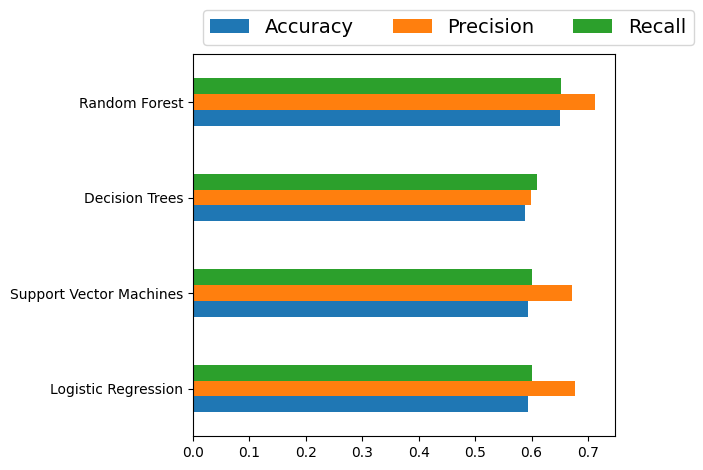

In [186]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

#### Выявление лучшей модели

In [187]:
best_model_name = df_model.sort_values(by=['Accuracy'], ascending=False).index[0]
best_model_name

'Random Forest'